In [1]:
import numpy as np
import pandas as pd
import  random
from random import choice
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Mounting the Google Drive to access files. '/content/gdrive' is a common directory used for this purpose.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specifying the file path where the dataset is stored on Google Drive
file_path = '/content/gdrive/MyDrive/MSc e-Science/ACML/datasets/calo_shower_data.csv'

# Reading the dataset from the specified csv file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Importing the LabelEncoder module from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'type' column of the DataFrame and replacing it with the encoded values
data['type'] = label_encoder.fit_transform(data['type'])

# Displaying the first 10 rows of the DataFrame
data.head(10)

,shower_depth,shower_width,type
0,102.726547,41.060509,1
1,55.953644,19.107106,0
2,76.237938,21.859595,0
3,145.829765,18.478401,1
4,151.974596,33.539821,1
5,116.530096,16.458007,1
6,144.131034,31.500592,1
7,111.753172,23.468908,1
8,137.597230,23.265585,1
9,34.956490,17.096947,0


In [ ]:
def loss_function(t, y):
    """
    Calculate the loss between target values (t) and predicted values (y).

    Args:
    t (numpy.ndarray): Target values.
    y (numpy.ndarray): Predicted values.

    Returns:
    int: The calculated loss.
    """
    try:
        # Calculate the absolute difference between target and predicted values,
        # then sum up all the differences.
        L = np.sum(np.abs(t - y))
        return L
    except Exception as e:
        # Handle exceptions, if any, and print an error message.
        print("An error occurred:", e)
        return

In [ ]:
import numpy as np
import random

def trained_perceptron(X_inputs, T, learning_rate, max_epoch=1000, acceptable_accuracy=0.80, min_epoch=30):
    """
    Trains a perceptron model using the provided input-output pairs.

    Parameters:
        X_inputs (numpy.ndarray): Input data matrix with shape (N, m), where N is the number of data points and m is the number of inputs.
        T (numpy.ndarray): Target outputs with shape (N,).
        learning_rate (float): Learning rate for updating weights.
        max_epoch (int): Maximum number of epochs for training.
        acceptable_accuracy (float): Minimum accuracy rate to achieve before stopping training.
        min_epoch (int): Minimum number of epochs to run before considering stopping based on accuracy.

    Returns:
        cost (list): List of costs (loss) at each epoch.
        epochs (list): List of epochs.
        trained_params (list): List containing the trained weights and threshold.
    """
    # Extracting dimensions
    N, m = X_inputs.shape

    # Checking if the number of data points matches the number of targets
    if N != T.size:
        print("Number of data points and targets should be the same")
        return

    # Initialize threshold and weights randomly
    threshold = random.uniform(-1, 1)
    w = np.random.uniform(low=-1, high=1, size=m)

    # Create a dataset array combining inputs and targets
    D = np.array(list(zip(X_inputs, T)), dtype=object)

    epoch = 1
    current_w = np.copy(w)

    # Lists to store cost and accuracy over epochs
    cost = []

    print('Initial parameter values:')
    print('threshold =', threshold, 'w =', w)
    print()

    # Training loop
    while True:
        # Shuffle the dataset
        np.random.shuffle(D)

        # Lists to store predicted and actual targets
        pred_target = []

        # Store the previous weights
        previous_w = np.copy(current_w)

        for (x, t) in D:
            # Compute the weighted sum
            h = np.dot(current_w, x)
            # Apply threshold to get the predicted output
            y = 1 if h > threshold else 0
            # Update threshold and weights based on the error
            threshold -= learning_rate * (t - y)
            current_w += learning_rate * (t - y) * x

            pred_target.append([t, y])

        # Calculate the loss and accuracy rate
        L = loss_function(np.array(pred_target)[:, 0], np.array(pred_target)[:, 1])
        cost.append(L)
        accuracy_rate = 1 - L / N

        # Check stopping conditions
        if epoch >= max_epoch or list(previous_w) == list(current_w) or (accuracy_rate > acceptable_accuracy and epoch >= min_epoch):
            break

        epoch += 1

    # Return cost, epochs,and trained parameters
    return cost, list(range(1, epoch + 1)), [current_w, threshold]


In [ ]:
trained_perceptron??

In [ ]:
X_input=np.array(data[['shower_depth','shower_width']])
T=np.array(data['type'])
X_train, X_test, y_train, y_test = train_test_split(X_input, T, test_size=0.30, random_state=42)
y,x,trained_model_parameters=trained_perceptron(X_train,y_train,0.01)
print('Trained Model Parameters')
print('threhold=',trained_model_parameters[1])
for i,w in enumerate(trained_model_parameters[0]):
  print(f'W{i+1}=',w)

print('Number of iterations(epoch) is ',len(y))

Initial parameter values:
threshold = -0.716160799149749 w = [-0.28936382 -0.1822994 ]

Trained Model Parameters
threhold= 358.4738392006692
W1= 2.2605059661023725
W2= 5.774776615258616
Number of iterations(epoch) is  38


500000

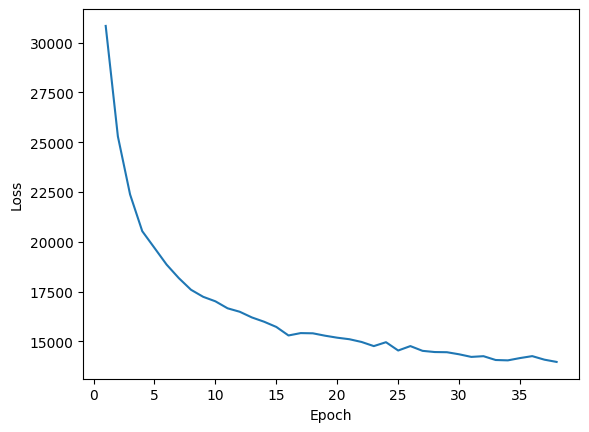

In [ ]:
plt.plot(x,y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
def perceptron_model(x, trained_model_parameters):
    """
    Predicts the class labels using the perceptron model.

    Parameters:
        x (numpy.ndarray): Input data matrix with shape (N, m), where N is the number of data points and m is the number of features.
        trained_model_parameters (tuple): Tuple containing trained weights (numpy.ndarray) and threshold (float).

    Returns:
        numpy.ndarray: Predicted class labels (binary) for the input data.
    """
    # Unpack the trained model parameters
    weights, threshold = trained_model_parameters

    # Compute the weighted sum
    weighted_sum = np.sum(weights * x, axis=1)

    # Apply threshold and convert to binary labels
    predictions = (weighted_sum > threshold).astype(int)

    return predictions

In [ ]:
y_pred=perceptron_model(X_test,trained_model_parameters)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14960
           1       0.89      0.86      0.88     15040

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



In [2]:
plt.scatter??

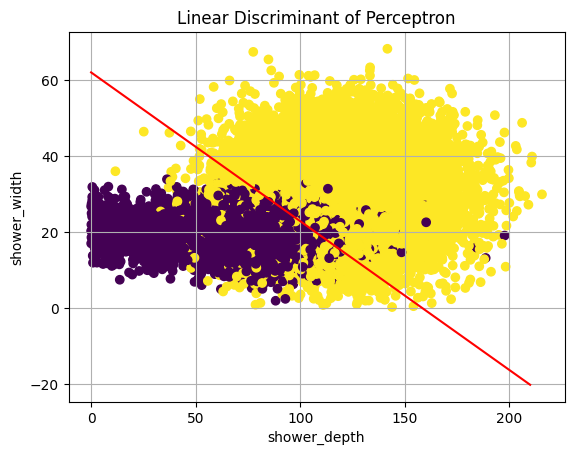

In [ ]:
# Extract trained weights and threshold
weights, threshold = trained_model_parameters

# Compute the slope and intercept of the linear discriminant line
slope = -weights[0] / weights[1]
intercept = threshold / weights[1]

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

# Plot the linear discriminant line
x_values = np.linspace(0, 210, 100)
plt.plot(x_values, slope * x_values + intercept, '-r')

plt.xlabel('shower_depth')
plt.ylabel('shower_width')
plt.title('Linear Discriminant of Perceptron')
plt.grid(True)
plt.show()

In [ ]:
np.linspace??


In [ ]:
# Specifying the file path where the dataset is stored on Google Drive
file_path1 = '/content/gdrive/MyDrive/MSc e-Science/ACML/datasets/heart.csv'

# Reading the dataset from the specified csv file into a Pandas DataFrame
data1 = pd.read_csv(file_path1)
# label_encoder=LabelEncoder()

data1.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Initial parameter values:
threshold = 0.6590783897325605 w = [ 0.15892983 -0.58742158 -0.08608678  0.76773537 -0.01387796 -0.75762012
  0.50753582  0.62952597 -0.54121772 -0.10840431 -0.32006625 -0.33781962
 -0.02557644]

Trained Model Parameters
threhold= -21.99092161026808
W1= 5.168929826781571
W2= -420.35742157768203
W3= 282.0939132165629
W4= -6.232264627079093
W5= 2.536122040300408
W6= -15.357620122506823
W7= 153.43753582116904
W8= 9.789525970712686
W9= -263.55121771743757
W10= -185.23440431476803
W11= 175.5499337478157
W12= -252.8078196153657
W13= -295.0455764432442
Number of iterations(epoch) is  8191


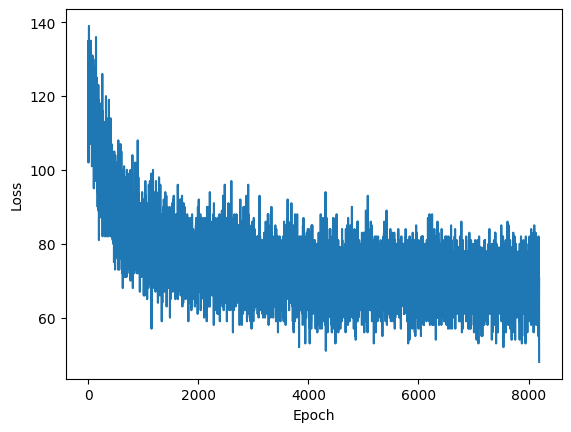

In [ ]:
X_input=np.array(data1[data1.columns[:-1]])

T=np.array(data1[data1.columns[-1]])
y,x,trained_model_parameters=trained_perceptron(X_input,T,0.01,max_epoch=10000,min_epoch=5000,acceptable_accuracy=0.84)
print('Trained Model Parameters')
print('threhold=',trained_model_parameters[1])
for i,w in enumerate(trained_model_parameters[0]):
  print(f'W{i+1}=',w)

print('Number of iterations(epoch) is ',len(y))
plt.plot(x,y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

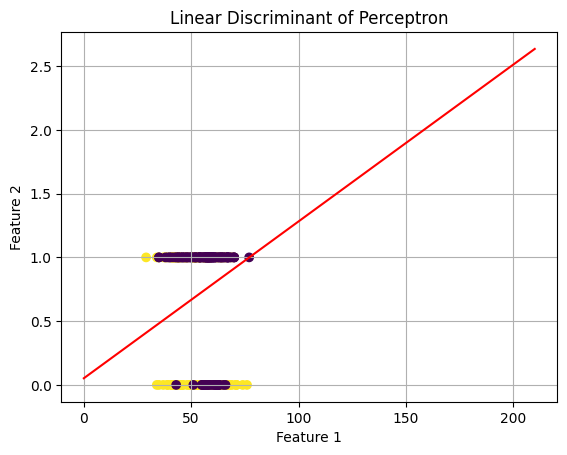

In [ ]:
# Extract trained weights and threshold
weights, threshold = trained_model_parameters

# Compute the slope and intercept of the linear discriminant line
slope = -weights[0] / weights[1]
intercept = threshold / weights[1]

# Plot the data points
plt.scatter(data1['age'],data1['sex'], c=T)

# Plot the linear discriminant line
x_values = np.linspace(0, 210, 100)
plt.plot(x_values, slope * x_values + intercept, '-r')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Discriminant of Perceptron')
plt.grid(True)
plt.show()

In [ ]:
def f(x1,x2):
    return 1 if 2*x1+3*x2-1>0 else 0
number_data_points=int(input('Enter number of data points: '))
X_input=[]
T=[]
for i in range(number_data_points):
    x1=choice([0,1])
    x2=choice([0,1])
    t= f(x1,x2)
    X_input.append([x1,x2])
    T.append(t)
# for i in range(int(number_data_points*0.10)):
#     i=choice(range(number_data_points))
#     T[i]= 1 if T[i]==0 else 0
X_input=np.array(X_input)
T=np.array(T)
y,x,trained_model_parameters=trained_perceptron(X_input,T,0.01)
print('Trained Model Parameters')
print('threhold=',trained_model_parameters[1])
for i,w in enumerate(trained_model_parameters[0]):
  print(f'W{i+1}=',w)

print('Number of iterations(epoch) is ',len(y))

Enter number of data points: 5000000
Initial parameter values:
threshold = 0.07619447691535441 w = [ 0.9590863 -0.9344489]

Trained Model Parameters
threhold= 0.006194476915354409
W1= 0.9790862988834719
W2= 0.01555110496903029
Number of iterations(epoch) is  2


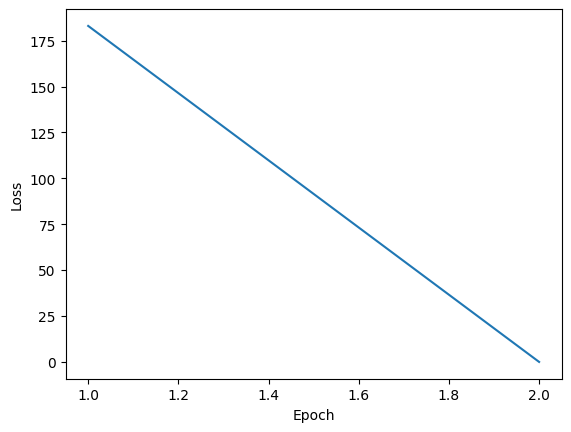

In [ ]:
plt.plot(x,y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot??

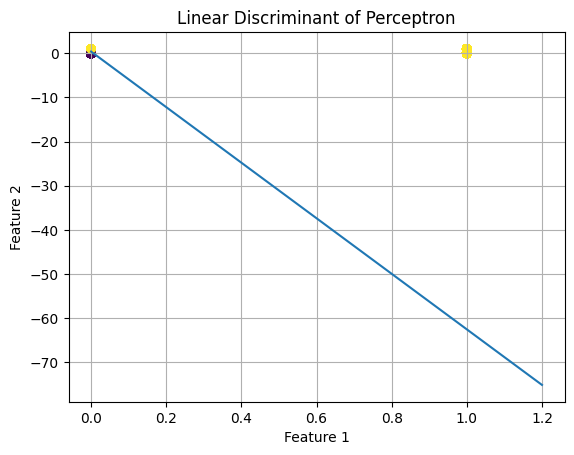

In [ ]:
# Extract trained weights and threshold
weights, threshold = trained_model_parameters

# Compute the slope and intercept of the linear discriminant line
slope = -weights[0] / weights[1]
intercept = threshold / weights[1]

# Plot the data points
plt.scatter(X_input[:, 0], X_input[:, 1], c=T)

# Plot the linear discriminant line
x_values = np.linspace(0, 1.2, 100)
plt.plot(x_values, slope * x_values + intercept)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Discriminant of Perceptron')
plt.grid(True)
plt.show()

Initial parameter values:
threshold = 0.8516302381790444 w = [0.40854905 0.19884839]

Trained Model Parameters
threhold= 0.6216302381790442
W1= 0.638549051672324
W2= 0.2688483889314879
Number of iterations(epoch) is  17


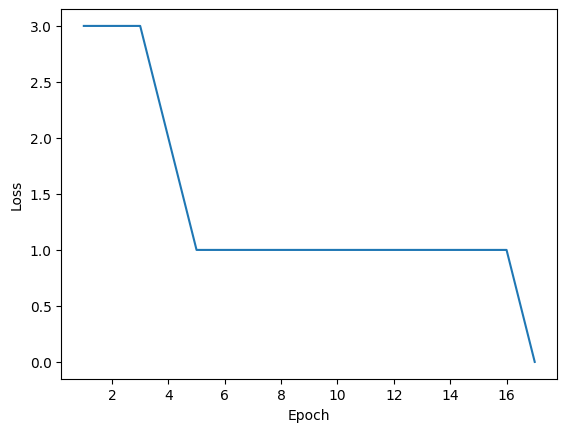

In [ ]:
X_input=np.array([
    [0,0],
    [1,1],
    [1,0],
    [1,1]
])
T=np.array([0,1,1,1])
y,x,trained_model_parameters=trained_perceptron(X_input,T,0.01)
print('Trained Model Parameters')
print('threhold=',trained_model_parameters[1])
for i,w in enumerate(trained_model_parameters[0]):
  print(f'W{i+1}=',w)

print('Number of iterations(epoch) is ',len(y))

plt.plot(x,y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

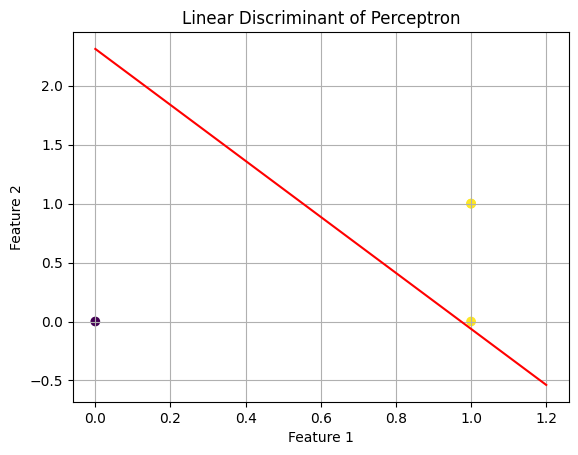

In [ ]:
# Extract trained weights and threshold
weights, threshold = trained_model_parameters

# Compute the slope and intercept of the linear discriminant line
slope = -weights[0] / weights[1]
intercept = threshold / weights[1]

# Plot the data points
plt.scatter(X_input[:, 0], X_input[:, 1], c=T)

# Plot the linear discriminant line
x_values = np.linspace(0, 1.2, 100)
plt.plot(x_values, slope * x_values + intercept, '-r')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Discriminant of Perceptron')
plt.grid(True)
plt.show()